### Classification of Iris Flower  

The project is focused on building and evaluating machine learning models for the classification of Iris flower species based on features such as *sepal length*, *sepal width*, *petal length*, and *petal width*. 

1. **Model Building**:
The project involves preprocessing the Iris dataset, including handling missing values, standardizing features, and splitting the data into training and testing sets. Then, it builds multiple machine learning models using different algorithms to predict the species of Iris flowers based on the provided features.

2. **Model Evaluation**:
The project evaluates their performance using accuracy scores on the testing dataset. The accuracy scores provide an indication of how well each model can classify Iris flower species. By comparing the accuracy scores of different models, the project aims to identify the most effective algorithm for this classification task

In [1]:
pwd

'C:\\Users\\vaish'

In [2]:
import os
os.chdir("E:\IITK_AI_ML")

In [3]:
pwd

'E:\\IITK_AI_ML'

In [4]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Observations** :
Here, we have **SepalLength**, **SepalWidth**, **PetalLength**, **PetalWidth**, **Species** as a feature.

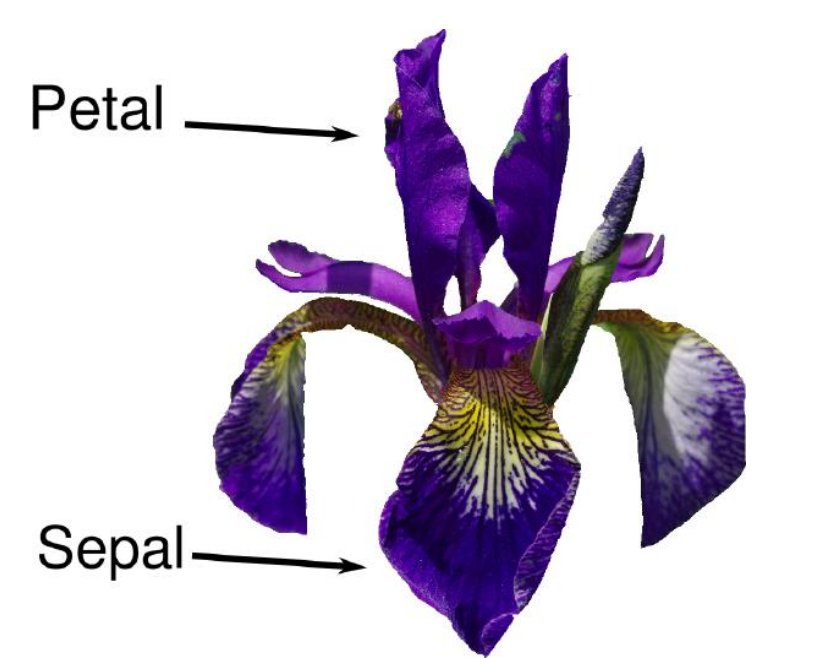

In [6]:
df.shape

(150, 6)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df = df.drop('Id', axis = 1)

In [9]:
df = df.rename(columns = {'SepalLengthCm':'Sepal length', 'SepalWidthCm':'Sepal Width', 'PetalLengthCm':'Petal length', 'PetalWidthCm': 'Petal width'})

**Insights:**
- Mean of **SepalLength** and **SepalWdith** is 5.84 and 3.05 cm.
- Mean of **PetalLength** and **PetalWdith** is 3.76 and 1.19 cm.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Species** for Iris flowers are:
1. *Setosa*
2. *Versicolor*
3. *Virginic*

**Data Preprocessing**

In [12]:
df.isnull().sum()

Sepal length    0
Sepal Width     0
Petal length    0
Petal width     0
Species         0
dtype: int64

**Preparing Feature and Target variables**

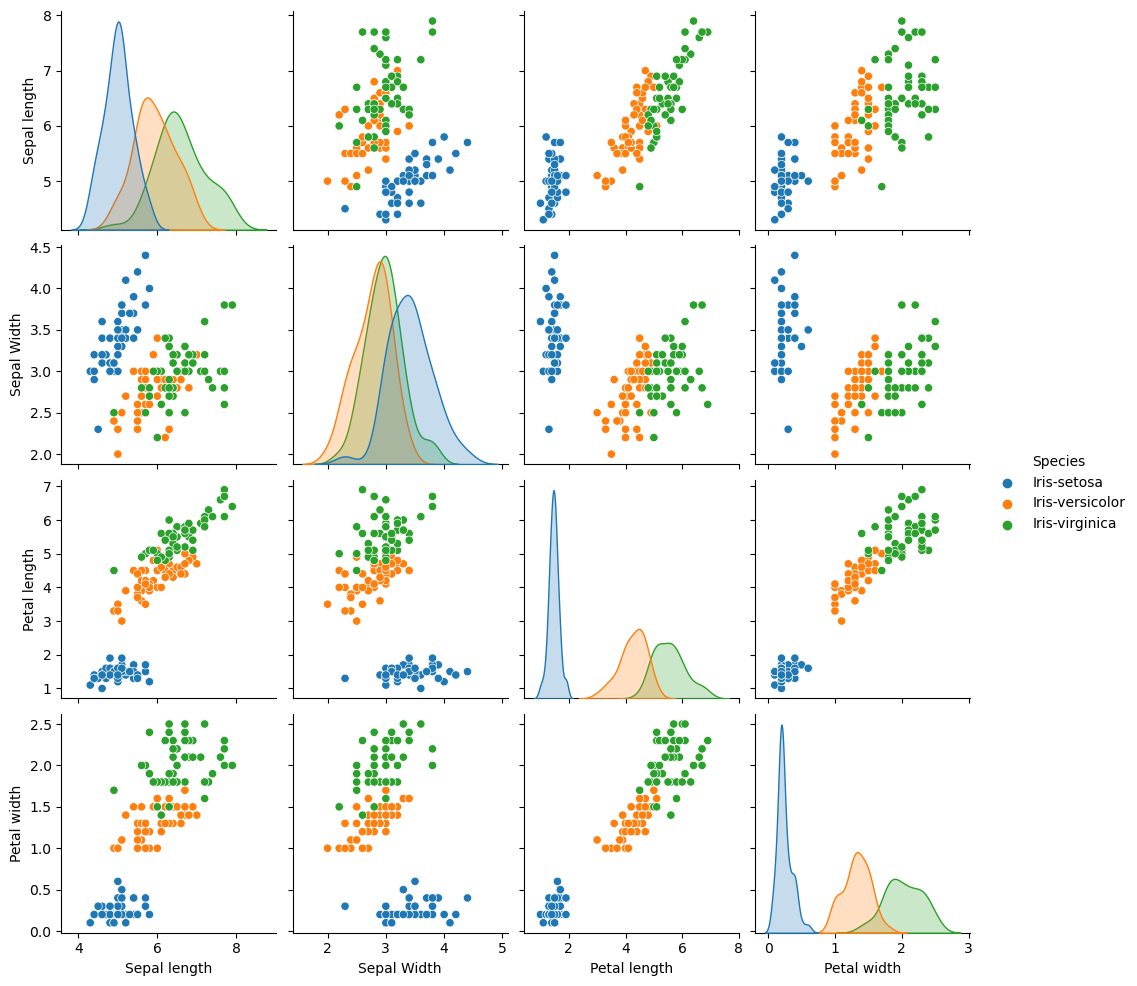

In [13]:
import seaborn as sns
sns.pairplot(data = df, hue = 'Species')

In [14]:
X = df.drop('Species', axis = 1) #features variables

In [15]:
y = df['Species'] #target variables

**Standardize the Features**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
scaled_features = scaler.transform(X)
scaled_features

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [19]:
df_feat = pd.DataFrame(scaled_features, columns = X.columns)
df_feat.head()

,Sepal length,Sepal Width,Petal length,Petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**Split the data into training and testing sets**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.20)

In [21]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_train:', y_test.shape)

X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_train: (30,)


## KNN Classifer

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test, pred))

[[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]


In [27]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [28]:
knn.score(X_test, y_test)

0.9333333333333333

**Obervation**
1. overall accuracy of knn model is 93%.

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [30]:
LR = LogisticRegression()

In [31]:
LR.fit(X_train, y_train)

LogisticRegression()

In [32]:
LR.score(X_train, y_train)

0.9666666666666667

In [33]:
LR.score(X_test, y_test)

0.9333333333333333

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [35]:
cross_val_score(LR, X_train, y_train, cv =5).mean()

0.9666666666666668

## SVM (Support Vector Mechanism)

In [36]:
#data can not perfectly linearly separable so we have to use non-linear SVM

In [37]:
from sklearn.svm import SVC
svc = SVC()

In [38]:
svc.fit(X_train,y_train)

SVC()

In [39]:
svc.score(X_train, y_train)

0.9666666666666667

In [40]:
svc.score(X_test, y_test)

0.9333333333333333

## RandomForestClassifer

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier()

In [43]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
rfc.score(X_train, y_train)

1.0

In [45]:
rfc.score(X_test, y_test)

0.9333333333333333

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
dt.score(X_test, y_test)

0.9333333333333333

## Grading Boosting Classifer

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gb = GradientBoostingClassifier()

In [52]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [53]:
gb.score(X_test, y_test)

0.9333333333333333

## XGBoost

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() #converting non numerical target column to numerical

In [57]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [58]:
xgb = XGBClassifier()

In [59]:
xgb.fit(X_train, y_train_encoded)

xgb.score(X_train, y_train_encoded)

xgb.score(X_test, y_test_encoded)

0.9

In [60]:
accracy_scores = {
    'KNN': knn.score(X_test, y_test),
    'Logistic Regression' :LR.score(X_test, y_test) ,
    'SVM': svc.score(X_test, y_test),
    'Random Forest':rfc.score(X_test, y_test),
    'Decision Tree':dt.score(X_test, y_test),
    'Gradient Boosting':gb.score(X_test, y_test),
    'XGBoost':xgb.score(X_test, y_test_encoded),
}

In [61]:
accracy_scores

{'KNN': 0.9333333333333333,
 'Logistic Regression': 0.9333333333333333,
 'SVM': 0.9333333333333333,
 'Random Forest': 0.9333333333333333,
 'Decision Tree': 0.9333333333333333,
 'Gradient Boosting': 0.9333333333333333,
 'XGBoost': 0.9}

- Porject by 
Vaishanvi Patel 